
## Minimum Norm Solution






## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [5]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [6]:

import PDFshapingUtils as PDF_tk


In [7]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [8]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [9]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [10]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

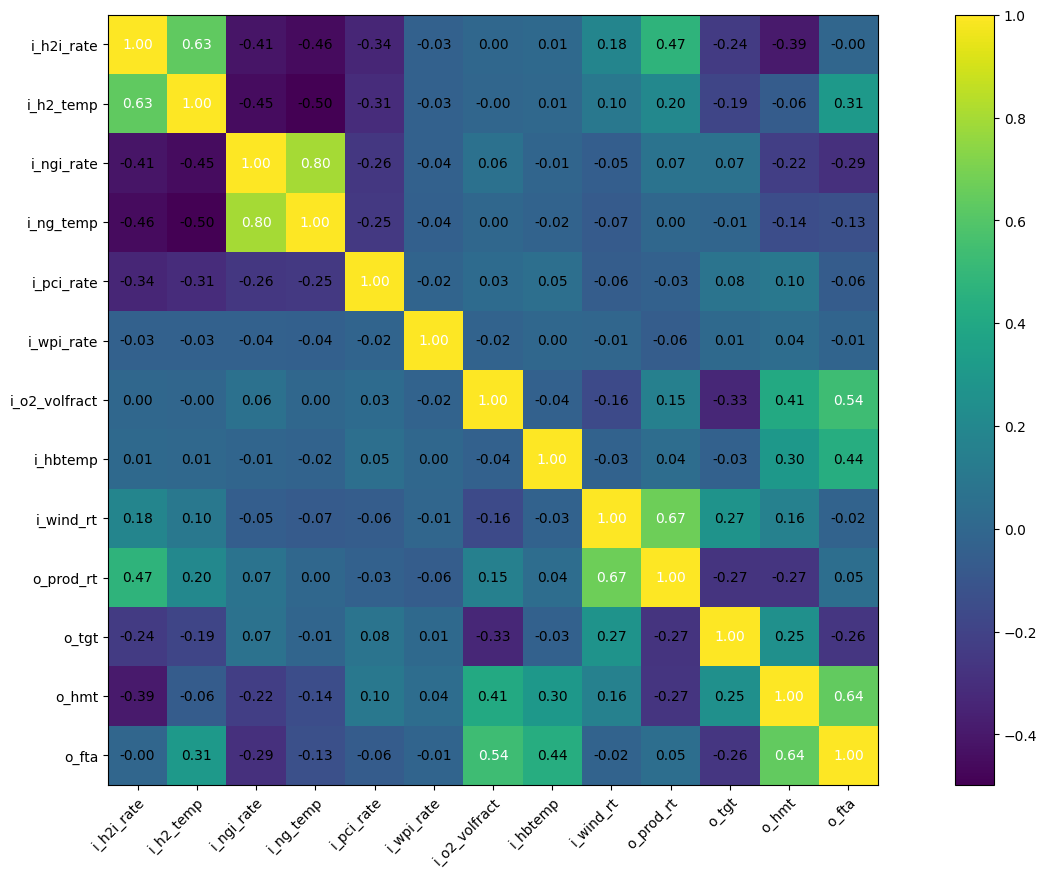

In [11]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [12]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [13]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [14]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [15]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [16]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [18]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [19]:

'''



from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca


'''


'\n\n\n\nfrom sklearn.decomposition import PCA\n\n# Instantiate PCA to reduce to 4 components\npca = PCA(n_components=4)\n\n# Fit on training data and transform both train and test\nX_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)\nX_test_pca  = pca.transform(PDFshapingOBJ.X_test)\n\n# Replace the original inputs with PCA-reduced versions\nPDFshapingOBJ.X_train = X_train_pca\nPDFshapingOBJ.X_test  = X_test_pca\n\n\n'

In [20]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [21]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [22]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [23]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [24]:


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(7, 4)       
        
        ## F2
        self.f2_linear1 = nn.Linear(7, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 4)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [25]:

n_inputs  = 7    ## 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [26]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     ResidualNet_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [27]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.22629374265670776
100 ..... 0.11831145733594894
200 ..... 0.10057220607995987
300 ..... 0.11448956280946732
400 ..... 0.0877268984913826
500 ..... 0.2375689446926117
600 ..... 0.13721509277820587
700 ..... 0.1770731508731842
800 ..... 0.1479850858449936
900 ..... 0.13367240130901337


In [28]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  97.2815, 1298.9647, 8442.1807, 2308.6541]])
y_deviations: tensor([[  50.2259,  519.6594, 1523.1155,  210.8402]])
x_means: tensor([[  12.5106,   18.5329,   41.0550,   25.5839,  268.7172, 1440.2960,
          198.6234]])
x_deviations: tensor([[ 15.2288,  45.3337,  46.3961,   3.3187, 358.1317, 157.5579,  26.5880]])


In [29]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  47.0555,  779.3053, 6919.0654, 2097.8140]])
tensor([[ 147.5074, 1818.6241, 9965.2959, 2519.4941]])



## Is model  invertible ?

* use the Jacobian


In [30]:

import torch
from torch.autograd.functional import jacobian


In [31]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

##x = torch.randn(      4, requires_grad=True)  # shape [7]


In [32]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [33]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [34]:

print( len(J) )


1


In [35]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 7])


In [36]:

u, s, v = torch.svd(J)  


In [37]:

rank = (s > 1e-5).sum()


In [38]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4



## Example of Min Norm Solution


In [39]:

import torch
from torch.autograd.functional import jacobian

def solve_minimum_norm_update(x0, target_y):
    """
    Computes a minimum-norm update step for the input x0 towards the target_y.
    
    Args:
        model (nn.Module): The neural network.
        x0 (torch.Tensor): Initial guess for the input.
        target_y (torch.Tensor): The desired output.

    Returns:
        torch.Tensor: The minimum-norm update to x0 (Delta x).
    """
    # Ensure the input requires gradients
    
    x = x0.detach().clone().requires_grad_(True)
    
    # Define a function to compute the output for use with jacobian()
    ## def func(input_x):
    ##    return model(input_x)

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    J_pinv = torch.pinverse(J)
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    delta_x = J_pinv @ delta_y
    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x


###################################################################
# Example usage with a simple model (ensure model is defined)
## model = model_Forward()

input_dim  = 7    # 4
output_dim = 4

x0       = torch.randn(1, input_dim)

target_y = torch.randn(1, output_dim)
delta_x = solve_minimum_norm_update( x0, target_y)

x_new = x0 + delta_x

print( x_new )



tensor([[-196.6479,  118.9803,  -80.0912,  -29.1193,    5.2897,  -14.8411,
          310.6926]], grad_fn=<AddBackward0>)



## Approach


In [74]:

def solve_minimum_norm_update_LM(x0, target_y, lambda_reg=1e-2):

    # prepare x
    x = x0.detach().clone().requires_grad_(True)

    # compute Jacobian and residual
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    current_y = wrapped_model(x)
    delta_y = (target_y - current_y).view(-1)   # [4]

    # reshape Jacobian to [4,7]
    J = J.squeeze(0)  # [4, 7]

    # LM update:  (Jᵀ J + λ I) Δx = Jᵀ Δy

    JT = J.T                     # [7,4]
    JTJ = JT @ J                 # [7,7]
    A = JTJ + lambda_reg * torch.eye(JTJ.shape[0])   # [7,7]
    b = JT @ delta_y             # [7]

    # solve the linear system A Δx = b
    delta_x = torch.linalg.solve(A, b)

    # optional: limit step size for safety
    step_limit = 5.0
    norm = delta_x.norm()
    if norm > step_limit:
        delta_x = delta_x * (step_limit / norm)

    return delta_x.view_as(x0)



In [75]:



def solve_minimum_norm_update(x0, target_y):

    x = x0.detach().clone().requires_grad_(True)

    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
 
    # FIX: Correct Jacobian and delta_y shapes
    J = J.squeeze(0)              # [4, 7]
    ##delta_y = delta_y.view(-1)    # [4]
    delta_y = delta_y.detach().view(-1)


   
    # SVD pseudoinverse
    ##U, S, Vt = torch.linalg.svd(J)      # U=[4,4], S=[4], Vt=[4,7]
    U, S, Vt = torch.linalg.svd(J, full_matrices=False)
    
  
    
    S_inv = S / (S*S + 1e-6)
    J_pinv = Vt.T @ torch.diag(S_inv) @ U.T   # (7×4)(4×4)(4×4) → 7×4

    delta_x = J_pinv @ delta_y

    # NEW: normalize direction so updates have power
    delta_x = delta_x / (delta_x.norm() + 1e-6)

    
    
    delta_x = torch.clamp(delta_x, -10, 10)

    return delta_x.view_as(x0)





In [76]:



x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    for j in range(10):
        
        ##delta_x  = solve_minimum_norm_update(   x_temp, target_y )
        delta_x  = solve_minimum_norm_update_LM(x_temp, target_y, lambda_reg=1e-2)
        ## x_temp   = x_temp + delta_x
        ##x_temp   = x_temp + 0.01 * delta_x 
        ##x_temp   = x_temp + 5.0 * delta_x
        
        
        x_temp = x_temp + delta_x



        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    ## x_new_solution    = pca.inverse_transform( x_new_np   )
    ## x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_np )
    print( x_real_np )
    
    print(i)
    print('********************************')



[  -4.958347   -7.115243  133.88686    27.603416   11.742373 1198.8438
  208.66122 ]
[   0.   10.   40.   24.    0. 1480.  230.]
1
********************************
[   4.4627028  -12.909445   114.00586     25.20858     19.831783
 1202.8005     200.41533  ]
[  10.    0.    0.   30. 1200. 1200.  195.]
2
********************************
[ -12.649157     3.4737897  126.71312     25.563461     8.989328
 1210.7146     189.87817  ]
[   0.  125.    0.   21.    0. 1600.  195.]
3
********************************
[   1.7468069   -7.6760235  110.517555    27.503218     2.8773031
 1200.3232     206.11761  ]
[   0.    0.   80.   27.    0. 1200.  230.]
4
********************************
[   4.8700433    9.759863   124.25753     31.322514     1.2085769
 1203.3496     196.96202  ]
[   0.    0.  150.   30.    0. 1200.  195.]
5
********************************
[   0.21377254  -24.939312    139.76776      30.84966       5.3075895
 1206.4977      179.35197   ]
[   0.    0.   90.   27.    0. 1448.  195.]
6


[   6.040876  -17.814468  130.55536    28.928972    4.780203 1201.0111
  200.40135 ]
[  50.    0.    0.   30.  300. 1448.  195.]
62
********************************
[   2.6728783   -1.0560784  110.62254     27.594357     8.013112
 1202.7142     223.11494  ]
[   0.   90.    0.   24.    0. 1480.  230.]
63
********************************
[   4.36084   -20.985     116.804886   24.937494   16.65242  1196.2289
  201.08958 ]
[  10.    0.    0.   24. 1200. 1200.  195.]
64
********************************
[  -0.25121576   -4.9882097   122.89456      33.21368      -4.922888
 1191.343       189.26642   ]
[   0.  200.    0.   27.    0. 1600.  195.]
65
********************************
[   0.71096504   -8.22908     121.781006     27.566055     10.9395895
 1194.0076      177.45305   ]
[  20.    0.    0.   24. 1200. 1600.  160.]
66
********************************
[   9.051123   -7.118104  118.718895   25.975275    1.344759 1199.3181
  220.15454 ]
[  50.    0.    0.   30.  600. 1200.  230.]
67
******

[  -1.3415272  -17.87321    136.55968     28.495028     5.5358944
 1209.4504     184.39001  ]
[   0.   90.   60.   24.    0. 1480.  195.]
126
********************************
[  -1.2637584  -24.38686    132.68544     25.758677    12.438064
 1210.1683     188.4416   ]
[  30.    0.    0.   21.  600. 1600.  195.]
127
********************************
[  -6.1639204  -10.195452   135.8902      27.155077     9.299059
 1198.876      191.44264  ]
[  30.    0.    0.   27.  600. 1600.  195.]
128
********************************
[   5.501419  -21.68431   115.4553     30.096682   12.438029 1191.5737
  202.8924  ]
[  10.    0.    0.   30.  300. 1600.  230.]
129
********************************
[   6.2381916  -23.12235    123.098724    23.804853     9.54288
 1202.511      209.54475  ]
[   0.   80.   20.   21.    0. 1480.  195.]
130
********************************
[  -3.9040399  -13.349537   120.65808     26.94203      9.551713
 1203.2701     187.36288  ]
[  10.    0.    0.   30.  600. 1480.  160.]
1

[  -6.3258657  -17.264856   119.34416     23.854338     8.595588
 1204.0736     190.92169  ]
[   0.    0.   41.   21.    0. 1200.  195.]
190
********************************
[   6.7343807  -13.162893   112.05707     28.126856    13.67183
 1199.4967     210.0985   ]
[   0.    0.  100.   30.    0. 1480.  230.]
191
********************************
[   7.169192   -7.257973  100.1641     24.216507    5.610239 1186.4211
  220.1615  ]
[   0.    0.  120.   21.    0. 1480.  230.]
192
********************************
[  -2.2206738  -27.25576    130.80614     23.39308      6.8472576
 1210.9111     192.90268  ]
[   0.    0.   41.   24.    0. 1200.  160.]
193
********************************
[  -3.7186053     0.22292852  112.88782      24.933355     -6.108945
 1185.8309      174.78339   ]
[   0.    0.  120.   27.    0. 1200.  160.]
194
********************************
[ -10.594702     1.7303389  133.73814     27.354572     1.6771461
 1207.775      181.38747  ]
[   0.  150.    0.   30.    0. 1200.  

[   5.9313135  -17.364779   113.0419      29.118671    18.402914
 1194.6781     203.88458  ]
[   0.    0.   70.   27.    0. 1600.  230.]
254
********************************
[ -11.152648   -12.824861   129.98743     30.005865     3.2062826
 1211.6412     188.73006  ]
[   0.    0.   80.   24.    0. 1600.  195.]
255
********************************
[  11.376972    -6.164591   119.055115    27.394272    -3.4177547
 1201.0973     210.8378   ]
[  50.    0.    0.   21. 1200. 1600.  230.]
256
********************************
[  -1.122236  -20.340265  125.42836    26.942255    8.29662  1202.9648
  182.42172 ]
[  20.    0.    0.   30.  300. 1200.  160.]
257
********************************
[   5.0092516    -3.2835448   113.41775      24.439795     -0.67019254
 1195.4312      211.6063    ]
[   0.  125.    0.   21.    0. 1480.  195.]
258
********************************
[   7.7386     -12.196485   130.25189     26.977386     1.5823706
 1197.4996     193.23885  ]
[   0.    0.  150.   24.    0. 144

[   3.876764    6.504156  109.27233    20.23226    -8.04929  1198.4972
  227.51097 ]
[  50.    0.    0.   21.  300. 1200.  230.]
313
********************************
[   7.2875457   -8.50822    119.605225    31.362        9.000226
 1197.8751     209.3687   ]
[  20.    0.   70.   30.  300. 1600.  230.]
314
********************************
[   5.5414944   17.154873   112.41606     26.857126     1.5546651
 1196.7229     221.43196  ]
[   0.  175.    0.   21.    0. 1600.  230.]
315
********************************
[   6.2350903   -9.714239   107.69482     27.9646      11.636566
 1196.8523     211.86891  ]
[   0.   10.   40.   21.    0. 1480.  230.]
316
********************************
[   3.6601334  -15.31811    112.318726    25.503788    16.049643
 1197.6119     185.35356  ]
[  20.    0.    0.   24.  300. 1600.  160.]
317
********************************
[   4.813858    -5.5724325  129.93535     24.656963    -1.3001711
 1199.4432     226.0269   ]
[   0.    0.  150.   24.    0. 1448.  230.]

[   4.157137    -2.7963803  133.09908     27.822006     2.1506474
 1199.2194     224.34177  ]
[  20.    0.   90.   27.  300. 1600.  230.]
370
********************************
[  -3.5858042  -14.198016   132.97496     25.616095     8.794848
 1203.5729     177.72115  ]
[  20.    0.    0.   24. 1200. 1200.  160.]
371
********************************
[   6.241906  -21.419468  116.040375   24.055416   11.580363 1201.3052
  200.9666  ]
[  40.    0.    0.   21.  600. 1480.  195.]
372
********************************
[  -6.20415    -20.132963   140.75758     28.09589     -1.3388443
 1209.4733     193.01028  ]
[  30.    0.    0.   24.  300. 1600.  195.]
373
********************************
[   2.563066     1.377069   114.6682      30.728964    -6.5432186
 1198.8945     188.94627  ]
[   0.  150.    0.   27.    0. 1200.  195.]
374
********************************
[   8.246333  -21.70964   116.47572    25.159966   14.521777 1201.8394
  204.54063 ]
[  50.    0.    0.   27.  900. 1480.  195.]
375
**

[   1.9290891   -5.600374   107.439316    23.168806    11.283881
 1188.5916     192.51077  ]
[   0.    0.   80.   21.    0. 1480.  160.]
433
********************************
[  -8.503418  -17.891903  145.12514    26.079046    4.939879 1211.6165
  181.37839 ]
[   0.  200.    0.   30.    0. 1200.  160.]
434
********************************
[   3.2107558  -16.732876   113.84059     29.609507    13.843573
 1193.2369     201.14597  ]
[   0.   41.    0.   30.    0. 1200.  195.]
435
********************************
[  -3.8204856  -14.323151   109.65753     25.285385     7.040207
 1203.4053     197.81001  ]
[  10.    0.    0.   30.  300. 1480.  160.]
436
********************************
[   3.7177348  -20.566557   115.148285    28.31526     18.63518
 1192.822      199.85605  ]
[   0.    0.   41.   27.    0. 1600.  230.]
437
********************************
[   3.8124223  -14.502719   114.28429     29.67974     15.623758
 1193.1847     199.24728  ]
[   0.    0.   41.   30.    0. 1600.  230.]
43

[   0.87654406  -18.901365    109.66044      25.325237     11.82341
 1205.1868      213.34332   ]
[   0.    0.   90.   24.    0. 1480.  195.]
498
********************************
[  11.226553    -5.204735   119.39184     24.322218    -1.0524558
 1200.2295     201.66962  ]
[  50.    0.    0.   24.  300. 1448.  195.]
499
********************************
[  -1.9612597  -15.5336     143.54211     30.64492      1.6451999
 1204.4994     186.36148  ]
[   0.    0.  120.   30.    0. 1448.  195.]
500
********************************
[   4.8208237   -2.1117134  112.03581     26.663925    17.850355
 1199.177      210.49802  ]
[  10.    0.  100.   30.  300. 1600.  230.]
501
********************************
[   5.7878947  -24.191635   125.007835    28.602068    15.507539
 1194.4056     210.26047  ]
[  30.    0.    0.   30. 1200. 1480.  230.]
502
********************************
[   1.3310978  -10.800237   125.68985     29.525164    15.654561
 1197.0776     179.60162  ]
[   0.    0.   41.   27.    0.

[   2.9804604  -12.6549635  109.437386    26.60962     11.252484
 1188.8102     187.34543  ]
[   0.    0.   41.   24.    0. 1200.  195.]
564
********************************
[  -0.41512793   22.55909     113.85394      21.152712     -7.08318
 1198.9907      229.28568   ]
[  30.    0.   80.   24.  300. 1200.  230.]
565
********************************
[ -11.42461    -8.093404  148.75668    23.255035    4.944272 1212.8805
  189.16917 ]
[  30.    0.    0.   21.  300. 1480.  195.]
566
********************************
[   1.3097103   -2.2435813  122.35302     28.2913      10.396649
 1201.979      167.20349  ]
[   0.   90.   60.   27.    0. 1480.  160.]
567
********************************
[   4.4709945   -5.735866   109.972694    26.997229    14.403769
 1195.7563     213.48114  ]
[  20.    0.   50.   27.  300. 1480.  195.]
568
********************************
[   9.097125  -17.180002  116.09223    28.151041   11.137874 1191.4667
  210.59203 ]
[   0.    0.  150.   30.    0. 1600.  195.]
569


[   4.9749427  -18.059216   121.1824      25.635008    12.740177
 1198.0608     200.38655  ]
[  40.    0.    0.   24. 1200. 1600.  195.]
628
********************************
[   2.9804025    2.5706227   98.64422     21.437037    -2.3932781
 1194.9392     212.249    ]
[   0.    0.  120.   21.    0. 1200.  230.]
629
********************************
[   1.590757  -18.776224  135.88666    30.046024   14.318769 1196.6395
  200.11467 ]
[   0.    0.  150.   30.    0. 1600.  195.]
630
********************************
[ -14.299671    -8.029402   129.80016     22.976675     4.1497455
 1205.0209     165.65157  ]
[   0.    0.   80.   21.    0. 1480.  160.]
631
********************************
[   5.0614176  -13.494064   124.862076    28.209682     4.3933797
 1199.154      191.20752  ]
[   0.    0.  150.   27.    0. 1448.  195.]
632
********************************
[  -3.4039264  -19.707378   127.45104     26.774647     6.6707263
 1207.3038     194.61967  ]
[  20.    0.    0.   27.  300. 1448.  195

[  -2.5100906  -30.335657   137.1085      20.822153     4.0990515
 1209.928      190.38393  ]
[  20.    0.   70.   24.  300. 1480.  160.]
694
********************************
[  -1.4212203  -11.706453   116.57297     26.34872     11.961322
 1199.9719     216.3124   ]
[   0.    0.  100.   24.    0. 1600.  230.]
695
********************************
[   3.4709635  -18.729198   128.57948     23.72738      8.429908
 1204.8416     201.9038   ]
[   0.    0.  150.   27.    0. 1448.  160.]
696
********************************
[  -2.403625  -13.329385  111.50832    28.85367    11.924635 1190.4242
  198.05083 ]
[   0.    0.   80.   30.    0. 1200.  195.]
697
********************************
[   6.0689116   -4.785157   112.51448     26.853119     6.0332084
 1194.6852     207.27666  ]
[   0.    0.   41.   21.    0. 1600.  230.]
698
********************************
[   5.9309826    7.1573353  120.088234    29.963896     1.9801184
 1203.2583     214.68379  ]
[   0.    0.  150.   27.    0. 1448.  230.

[  -8.335573    29.344772   141.02397     24.951237     1.2614052
 1201.0938     195.31715  ]
[  20.    0.   70.   27.  300. 1200.  195.]
759
********************************
[  -4.0112824   13.567299   109.891426    23.98166     -3.054858
 1193.1144     223.57065  ]
[   0.    0.  120.   27.    0. 1200.  195.]
760
********************************
[  -0.19672352  -17.862206    119.82386      26.003645      8.386401
 1203.57        185.0667    ]
[   0.   40.   10.   21.    0. 1480.  195.]
761
********************************
[   3.2014728    3.1839805  124.97523     26.9988       4.3265386
 1200.4042     218.9434   ]
[   0.   40.   60.   21.    0. 1480.  230.]
762
********************************
[  -9.934108    28.473969   144.78023     23.34259      3.4044003
 1198.975      201.37526  ]
[  20.    0.   90.   24.  300. 1480.  195.]
763
********************************
[   2.2327063   -9.20726    119.16704     27.342749    14.004582
 1189.9083     220.61562  ]
[   0.    0.  100.   27.    

[  -0.25384116  -14.771026    131.77797      31.847897      1.7125248
 1200.9954      202.76427   ]
[  10.    0.    0.   27.  600. 1200.  230.]
823
********************************
[   6.421234  -11.086601  132.28578    27.808167    1.560533 1198.6836
  221.11078 ]
[  50.    0.    0.   27. 1200. 1200.  230.]
824
********************************
[   3.7175117  -13.011068   117.53994     28.24019      9.708756
 1196.1321     219.6833   ]
[   0.    0.   80.   30.    0. 1200.  230.]
825
********************************
[   3.942798    -1.6250978  108.89664     26.042187     5.32317
 1195.4742     216.68925  ]
[   0.    0.   80.   21.    0. 1480.  230.]
826
********************************
[   2.5610306    5.903611   131.53879     29.474888     1.1606889
 1200.7161     229.07207  ]
[   0.    0.  150.   30.    0. 1200.  230.]
827
********************************
[  11.850252      7.851966    115.45228      35.202507      0.76922977
 1201.1005      207.5598    ]
[  10.    0.  100.   27.  300.

[  -2.156386  -20.769287  132.46216    24.407074    9.973747 1205.3126
  186.74062 ]
[  10.    0.  100.   27.  300. 1600.  160.]
887
********************************
[   6.865118  -29.379177  128.68352    29.744854    9.283122 1198.2184
  206.56644 ]
[  50.    0.    0.   30.  600. 1600.  230.]
888
********************************
[  -5.251496     29.570498    134.49828      24.902348      0.30392137
 1197.4855      194.02487   ]
[  30.    0.   40.   27.  300. 1200.  195.]
889
********************************
[   6.7584214   -3.6916919  121.92383     28.408676    -1.1764822
 1196.5707     216.45198  ]
[  30.    0.    0.   24. 1200. 1200.  230.]
890
********************************
[   1.5795094   -9.6748295  123.690605    28.38691     11.935175
 1193.6606     184.99014  ]
[  40.    0.    0.   30. 1200. 1200.  195.]
891
********************************
[  13.699872    -4.4743314  118.31573     29.50486     -2.083792
 1202.2936     189.7475   ]
[   0.    0.  150.   27.    0. 1200.  195.]


[  -9.279159  -18.644135  120.15831    27.784937    3.068704 1194.202
  172.79208 ]
[   0.    0.   80.   30.    0. 1200.  160.]
951
********************************
[   2.7766535  -27.311747   123.715904    25.400345    11.46692
 1199.2144     206.95503  ]
[   0.   10.   40.   27.    0. 1480.  195.]
952
********************************
[   8.476906    -2.4460912  122.7085      30.077583     5.8679843
 1200.386      217.58868  ]
[  20.    0.   90.   30.  300. 1480.  230.]
953
********************************
[  -2.0992599  -19.631998   123.55893     24.90875     12.867744
 1201.5719     192.91191  ]
[   0.  125.    0.   27.    0. 1200.  160.]
954
********************************
[   5.613472    6.14587   115.28062    25.79083     3.276793 1198.1
  226.05219 ]
[   0.   90.    0.   24.    0. 1200.  230.]
955
********************************
[   2.044963   -15.631998   113.27049     26.872427     7.0896482
 1197.9886     184.57333  ]
[   0.   90.   60.   30.    0. 1480.  160.]
956
********